# Flight Price Prediction 

### Contents

    1. Loading & Understanding Dataset and target & predictor variables.
    2. Feature Engineering.
    3. Explporatory Data Analysis.
    4. Feature Selection.
    5. Sampling dataset for model building.
    6. Model Building.
    7. Conclusion.

#### 1. Loading & Understanding Dataset and target & predictor variables

    a. Load required packages & libraries.
    b. Load dataset.
    c. Check dataset info -  head, tail, datatypes, dimensions etc.
    
    

#### a. Load Required packages & libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sklearn
import warnings


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore", category=FutureWarning)

#### b. Loading dataset

In [193]:
fp_train = pd.read_excel('Data_Train.xlsx')

#### Check dataset info -  head, tail, datatypes, dimensions etc.

In [194]:
fp_train.shape

(10683, 11)

In [195]:
fp_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [196]:
fp_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [197]:
fp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [198]:
fp_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [199]:
fp_train.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


#### 2. Explporatory Data Analysis: 
a.   Find out missing values.<br>
b.   Understand all categorical variables, their credibility and levels.<br>
c.   Understand all numerical variabels & their distribution.<br>
d.   Find out outliers in data.<br>
e.   Data analysis - Understand relationships between predictor variables & target variables, also find insights about target variable from data


#### a. Find out missing values in data

In [200]:
fp_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

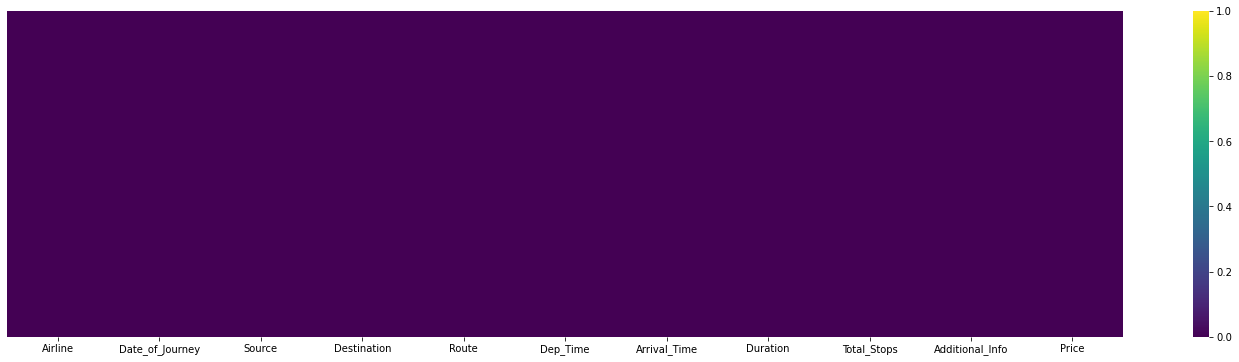

In [201]:
# Visualize missing data
plt.figure(figsize=(25,6))
sns.heatmap(fp_train.isnull(),yticklabels=False,cmap="viridis")
plt.show()

Here we have only two missing values in the route and Total_Stops Variables.
So We will impute values.

#### 2.Feature Engineering.

Missing Values Treatment

In [202]:
# Dropping all null values
fp_train.dropna(axis=0, how='any', inplace=True)
fp_train.shape

(10682, 11)

Convert Date_of_Journey to its appropriate format as datetime with regards to day and month

In [203]:
fp_train['Date_of_Journey'] = pd.to_datetime(fp_train["Date_of_Journey"])
fp_train['Day_of_Journey'] = (fp_train['Date_of_Journey']).dt.day
fp_train['Month_of_Journey'] = (fp_train['Date_of_Journey']).dt.month

In [204]:
fp_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [205]:
fp_train.drop(["Date_of_Journey"], axis=1, inplace=True) # Drop the Date_of_Journey col

Convert Dep_Time to its appropriate format as datetime format

In [206]:
fp_train['Dep_hr'] = pd.to_datetime(fp_train['Dep_Time']).dt.hour
fp_train['Dep_min'] = pd.to_datetime(fp_train['Dep_Time']).dt.minute

In [207]:
fp_train.drop(['Dep_Time'], axis=1, inplace=True) # Drop the Dep_Time col

Convert Arrival_time to its appropriate format as datetime format

In [208]:
fp_train["Arrival_hr"] = pd.to_datetime(fp_train['Arrival_Time']).dt.hour
fp_train['Arrival_min'] = pd.to_datetime(fp_train['Arrival_Time']).dt.minute

In [209]:
fp_train.drop(["Arrival_Time"],axis=1, inplace=True)# Drop the Dep_Time col

Split the  Duration column into two columns i.e. hour and minutes 

In [210]:
duration = fp_train['Duration'].str.split(' ', expand=True) # Split Duration records based on the space " "
duration[1].fillna('00m', inplace= True)              # Fill all NaN with "00m"
fp_train['Duration_hr'] = duration[0].apply(lambda x: x[:-1]) # Select the records at index zero (0) and leave the last one i.e. here in this case it count as hr (hours)
fp_train['Duration_min'] = duration[1].apply(lambda x: x[:-1]) # Select the records at the index position at one (1) and leave the last one here in this case it count as the min (minute)                                 

In [211]:
fp_train.drop(["Duration"],axis=1, inplace=True)# Drop the Dep_Time col

#### 3.Explporatory Data Analysis.

 #### Airline Vs Price 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

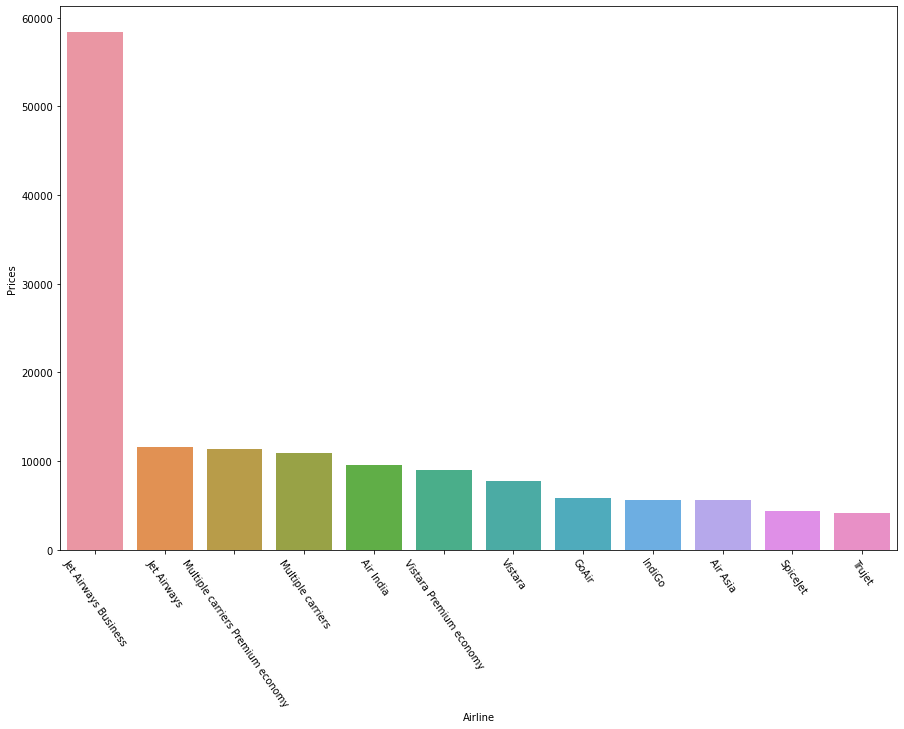

In [212]:
Airprices = fp_train.groupby('Airline')['Price'].mean().sort_values(ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index, Airprices.values)
plt.ylabel("Prices")
plt.xticks(rotation = 305)


Here We can see the jet Airways Business has the highest price with Trujet the lowest price for flying

#### Pices based on the Number of Stops 

In [213]:
fp_train.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

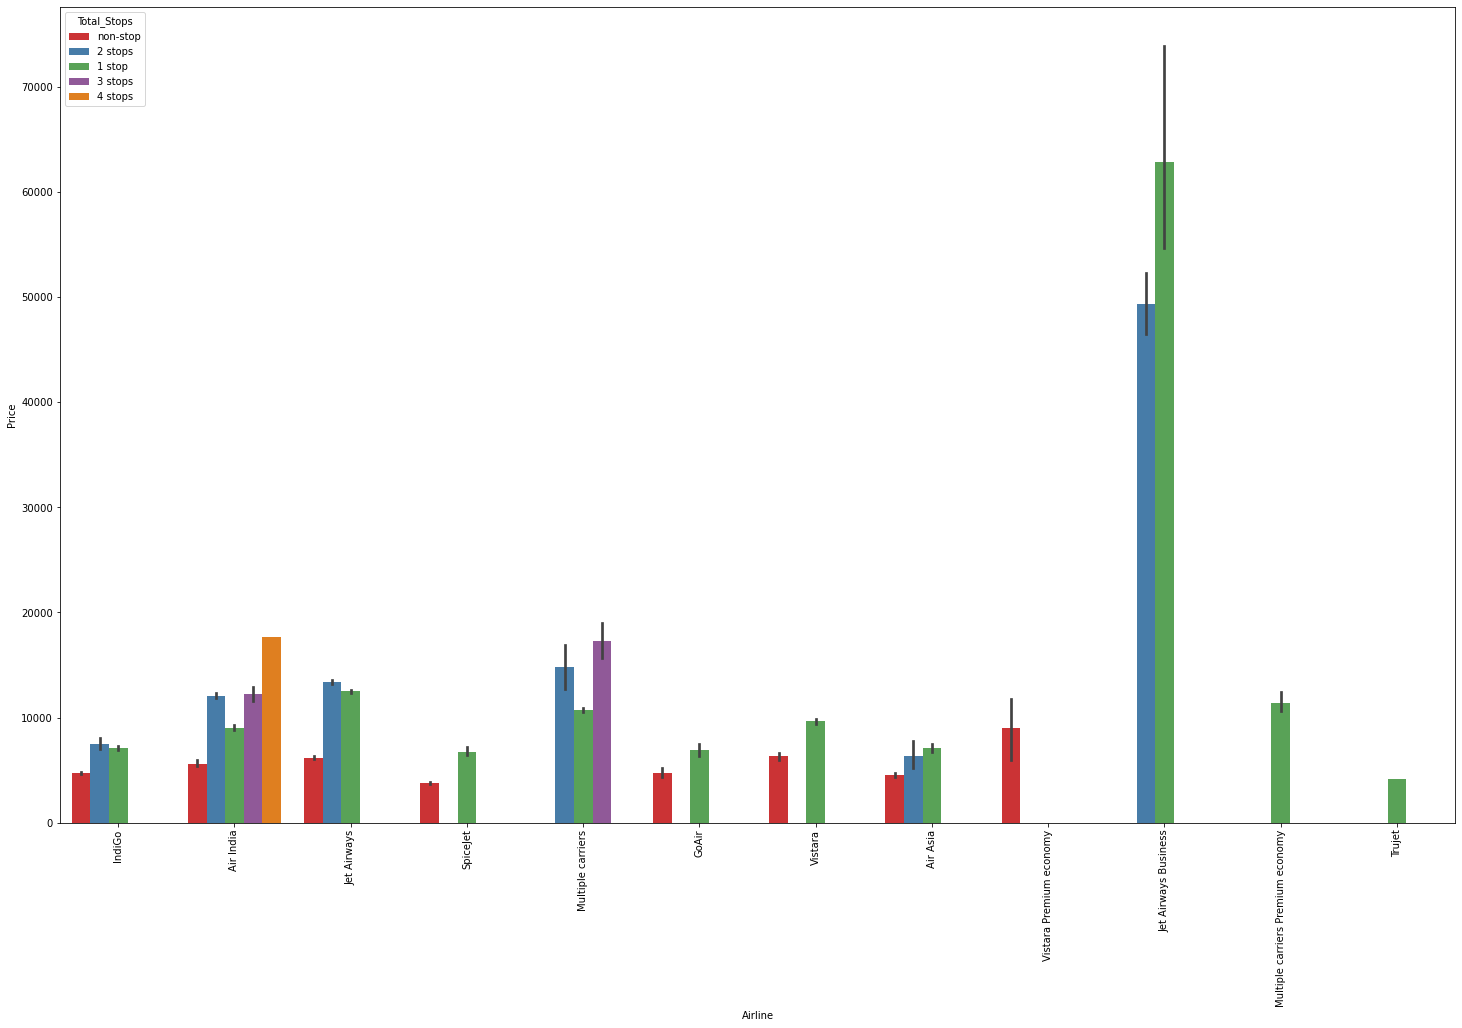

In [214]:
plt.figure(figsize=(25,15))
ax = sns.barplot(x=fp_train['Airline'], y = fp_train['Price'],hue=fp_train['Total_Stops'], palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()


#### Source vs Price

<function matplotlib.pyplot.show(*args, **kw)>

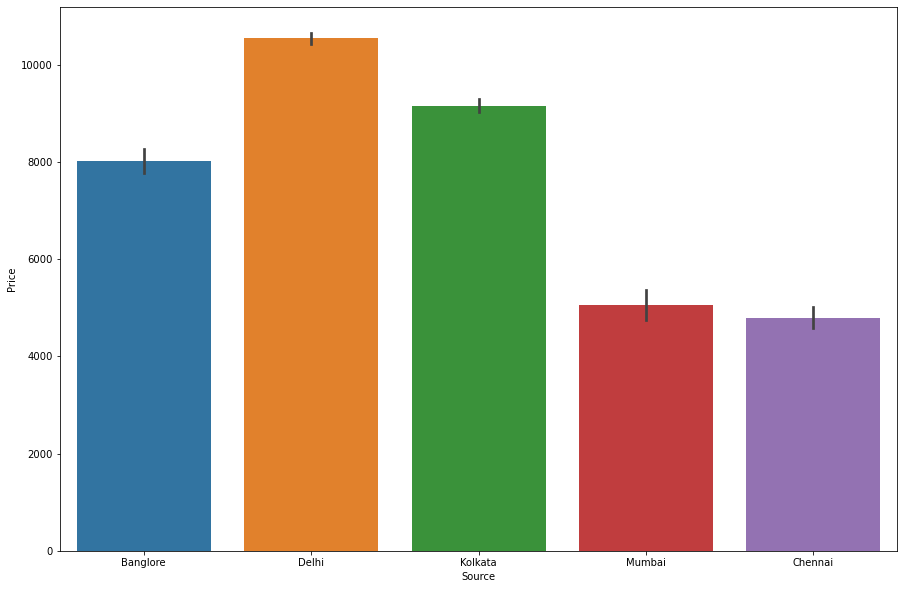

In [215]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=fp_train.sort_values('Price',ascending=False))
plt.show

#### Destination vs Price

<function matplotlib.pyplot.show(*args, **kw)>

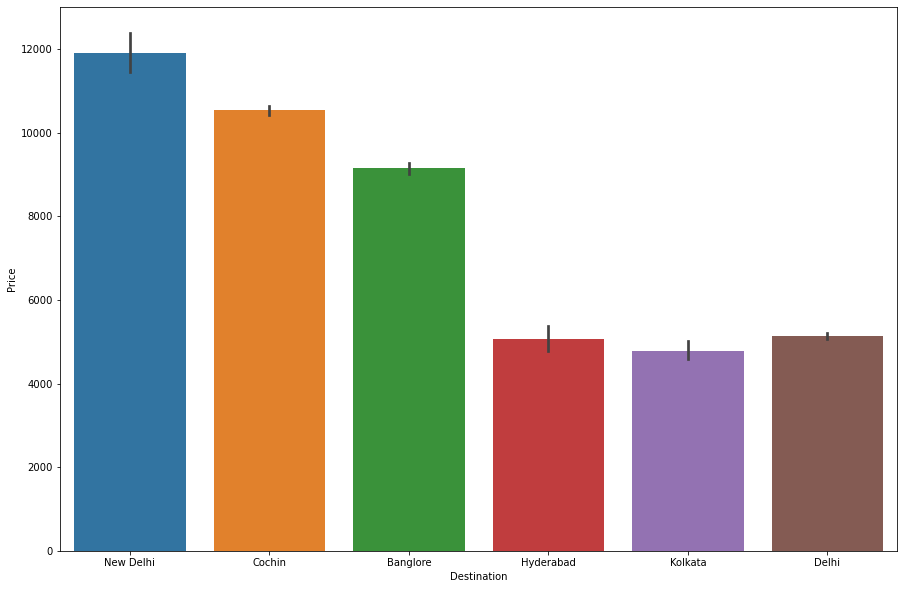

In [216]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=fp_train.sort_values('Price',ascending=False))
plt.show

In [217]:
for i in fp_train:
    fp_train.replace('New Delhi','Delhi',inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

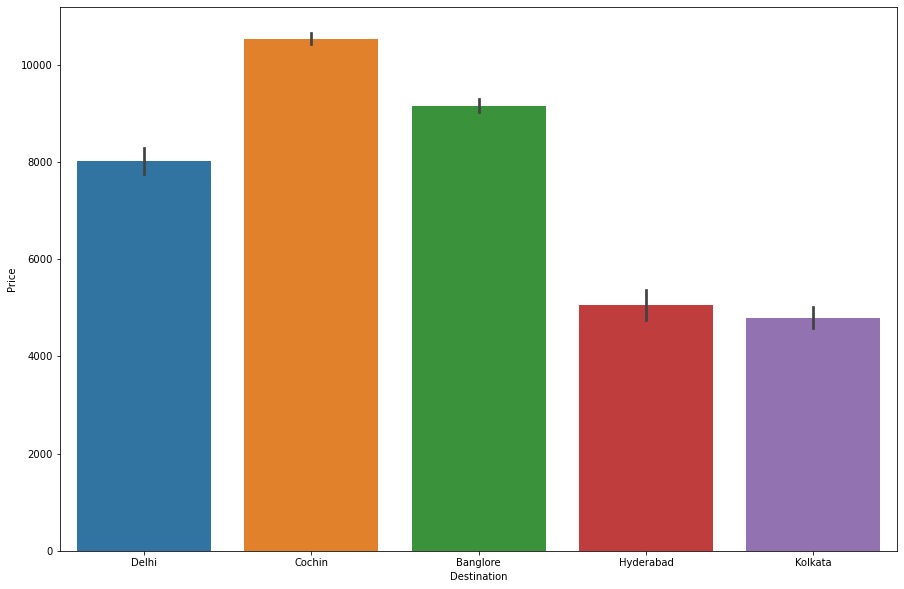

In [218]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=fp_train.sort_values('Price',ascending=False))
plt.show

### Handling Categorical variables  By using Onehot Encoding 

In [219]:
#Handling Categorical Values 
fp_train['Total_Stops']=fp_train['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(fp_train['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(fp_train[['Source','Destination']],drop_first=True)
fp_train=pd.concat([air_dummy,source_dest_dummy,fp_train],axis=1)

In [220]:
# Drop old features 
fp_train.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [221]:
fp_train.shape

(10682, 31)

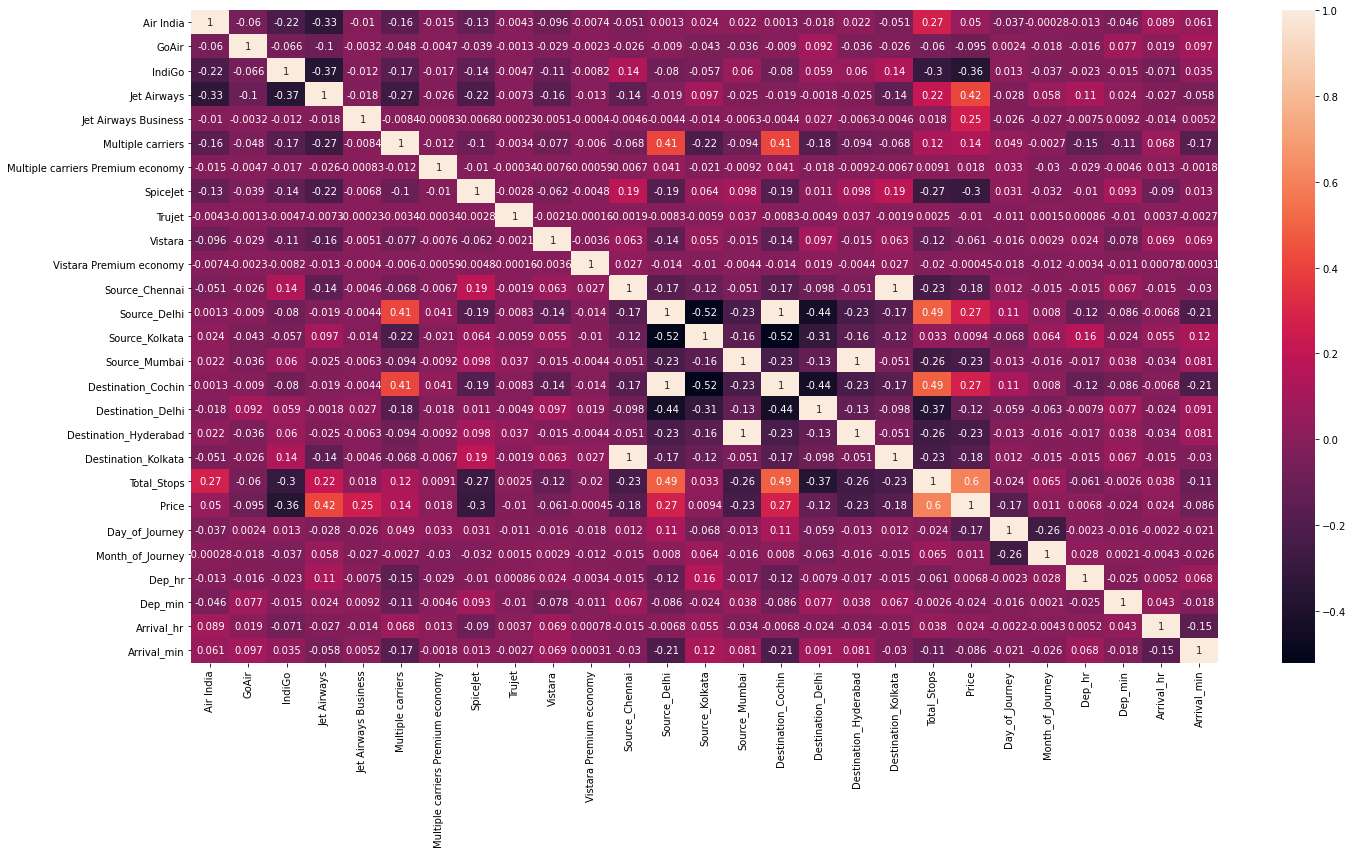

In [222]:
plt.figure(figsize=(23,12))
sns.heatmap(fp_train.corr(),annot=True)

#### The features are less correlated which is a good thing for us to avoid **Multicollinearity**

### Here we are perform Same  Feature engineering steps for test data also

In [223]:
fp_test=pd.read_excel("Test_set.xlsx")

In [224]:
fp_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [225]:
fp_test.isnull().sum() # In test data set we dont have any missing values so no neet to missing values treatment

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Convert Date_of_Journey to its appropriate format as datetime with regards to day and month

In [226]:
fp_test['Date_of_Journey'] = pd.to_datetime(fp_test["Date_of_Journey"])
fp_test['Day_of_Journey'] = (fp_test['Date_of_Journey']).dt.day
fp_test['Month_of_Journey'] = (fp_test['Date_of_Journey']).dt.month

In [227]:
fp_test.drop(["Date_of_Journey"], axis=1, inplace=True) # Drop the Date_of_Journey col

Missing Values Treatment

In [228]:
# Dropping all null values
fp_test.dropna(axis=0, how='any', inplace=True)
fp_test.shape

(2671, 11)

Convert Dep_Time to its appropriate format as datetime format

In [229]:
fp_test['Dep_hr'] = pd.to_datetime(fp_test['Dep_Time']).dt.hour
fp_test['Dep_min'] = pd.to_datetime(fp_test['Dep_Time']).dt.minute

In [230]:
fp_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [231]:
fp_test.drop(['Dep_Time'], axis=1, inplace=True) # Drop the Dep_Time col

Convert Arrival_time to its appropriate format as datetime format

In [232]:
fp_test["Arrival_hr"] = pd.to_datetime(fp_test['Arrival_Time']).dt.hour
fp_test['Arrival_min'] = pd.to_datetime(fp_test['Arrival_Time']).dt.minute

In [233]:
fp_test.drop(["Arrival_Time"],axis=1, inplace=True)# Drop the Dep_Time col

Split the  Duration column into two columns i.e. hour and minutes 

In [234]:
duration = fp_test['Duration'].str.split(' ', expand=True) # Split Duration records based on the space " "
duration[1].fillna('00m', inplace= True)              # Fill all NaN with "00m"
fp_test['Duration_hr'] = duration[0].apply(lambda x: x[:-1]) # Select the records at index zero (0) and leave the last one i.e. here in this case it count as hr (hours)
fp_test['Duration_min'] = duration[1].apply(lambda x: x[:-1]) # Select the records at the index position at one (1) and leave the last one here in this case it count as the min (minute)                                 

In [235]:
fp_test.drop(["Duration"],axis=1, inplace=True)# Drop the Dep_Time col

### Handling Categorical variables  By using Onehot Encoding 

In [236]:
#Handling Categorical Values 
fp_test['Total_Stops']=fp_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(fp_test['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(fp_test[['Source','Destination']],drop_first=True)
fp_test=pd.concat([air_dummy,source_dest_dummy,fp_test],axis=1)

In [237]:
# Drop old features 
fp_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [238]:
fp_test.shape

(2671, 28)

### 5. Sampling dataset for model building.

In [239]:
x=fp_train.drop(['Route', 'Price','Additional_Info'],axis=1)
y=fp_train['Price']

### 6. Model Building

#### A. ExtraTreesRegressor

In [240]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

#### Feature Importance 

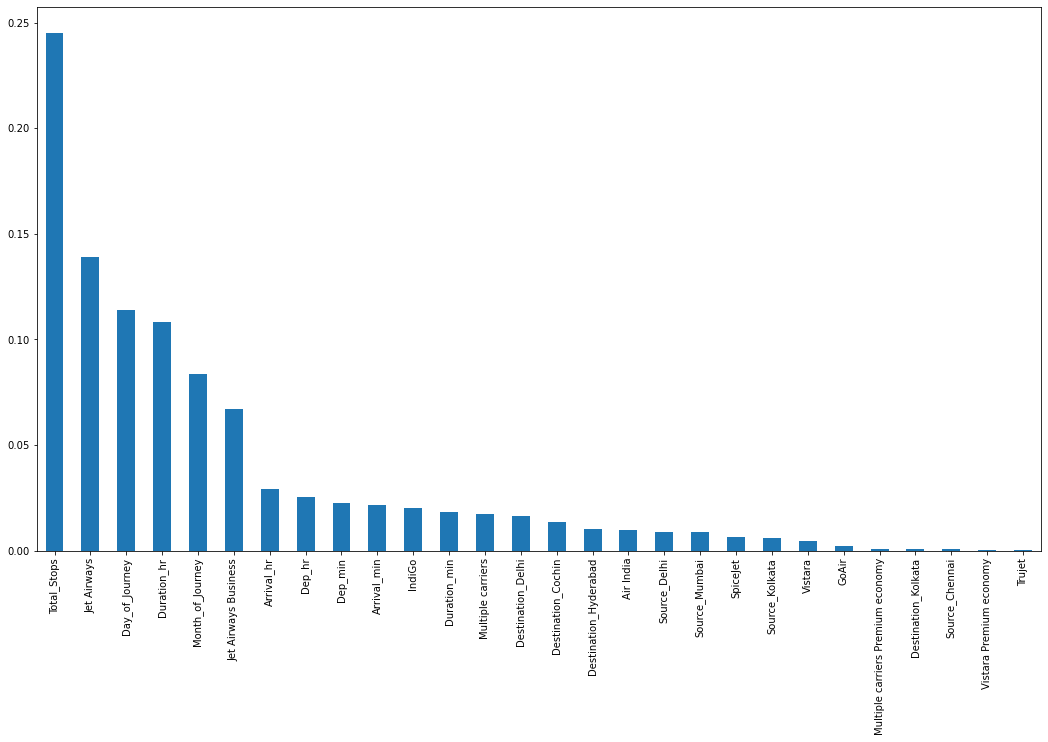

In [241]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [242]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [243]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7705456170237467

In [244]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7932484013566163

#### Hyperparameter Tuning

In [245]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [246]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [247]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12535.61729   ,  4294.08953927,  6144.67757049, ...,
       11617.70508682,  9642.65438061,  8661.78857979])

In [248]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1157.0115500577417
MSE 3970859.318405942


In [249]:
r2_score(y_test,rf_pred)

0.8066172161058045

#### B.  Cat Boost

In [251]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 1.87ms	remaining: 1.87s
1:	learn: 4319.1952920	total: 3.63ms	remaining: 1.81s
2:	learn: 4170.0874200	total: 5.42ms	remaining: 1.8s
3:	learn: 4033.1061207	total: 7.34ms	remaining: 1.83s
4:	learn: 3909.5332929	total: 9.82ms	remaining: 1.96s
5:	learn: 3788.8771850	total: 11.5ms	remaining: 1.9s
6:	learn: 3677.5795256	total: 13.3ms	remaining: 1.89s
7:	learn: 3585.9715553	total: 15ms	remaining: 1.86s
8:	learn: 3499.6424958	total: 16.7ms	remaining: 1.84s
9:	learn: 3408.9602975	total: 18.6ms	remaining: 1.84s
10:	learn: 3329.4018172	total: 20.7ms	remaining: 1.86s
11:	learn: 3258.4306577	total: 23.7ms	remaining: 1.95s
12:	learn: 3188.9732731	total: 25.7ms	remaining: 1.95s
13:	learn: 3126.6519374	total: 27.7ms	remaining: 1.95s
14:	learn: 3064.8092738	total: 29.8ms	remaining: 1.96s
15:	learn: 3011.9738031	total: 31.8ms	remaining: 1.96s
16:	learn: 2960.0953295	total: 33.8ms	remaining: 1.95s
17:	learn: 2917.5532184	total: 35.6ms	remaining: 1

167:	learn: 1932.9545795	total: 316ms	remaining: 1.56s
168:	learn: 1931.6124443	total: 318ms	remaining: 1.56s
169:	learn: 1929.5307514	total: 320ms	remaining: 1.56s
170:	learn: 1927.4963218	total: 321ms	remaining: 1.56s
171:	learn: 1925.4669384	total: 323ms	remaining: 1.56s
172:	learn: 1924.3200339	total: 325ms	remaining: 1.55s
173:	learn: 1922.7154464	total: 327ms	remaining: 1.55s
174:	learn: 1920.9589969	total: 329ms	remaining: 1.55s
175:	learn: 1919.1457003	total: 331ms	remaining: 1.55s
176:	learn: 1918.1069516	total: 333ms	remaining: 1.55s
177:	learn: 1916.2214512	total: 335ms	remaining: 1.54s
178:	learn: 1913.5124519	total: 336ms	remaining: 1.54s
179:	learn: 1911.4800432	total: 338ms	remaining: 1.54s
180:	learn: 1909.3957573	total: 339ms	remaining: 1.53s
181:	learn: 1908.4135607	total: 341ms	remaining: 1.53s
182:	learn: 1906.5491885	total: 343ms	remaining: 1.53s
183:	learn: 1904.6147159	total: 345ms	remaining: 1.53s
184:	learn: 1903.7135890	total: 346ms	remaining: 1.52s
185:	learn

328:	learn: 1736.2589351	total: 579ms	remaining: 1.18s
329:	learn: 1735.4256185	total: 581ms	remaining: 1.18s
330:	learn: 1735.2946332	total: 583ms	remaining: 1.18s
331:	learn: 1734.5323241	total: 584ms	remaining: 1.18s
332:	learn: 1732.6404977	total: 586ms	remaining: 1.17s
333:	learn: 1732.5282950	total: 588ms	remaining: 1.17s
334:	learn: 1731.4241971	total: 589ms	remaining: 1.17s
335:	learn: 1729.9668045	total: 591ms	remaining: 1.17s
336:	learn: 1729.1779869	total: 593ms	remaining: 1.17s
337:	learn: 1729.0852102	total: 595ms	remaining: 1.16s
338:	learn: 1728.1482089	total: 596ms	remaining: 1.16s
339:	learn: 1726.7783890	total: 598ms	remaining: 1.16s
340:	learn: 1726.2547590	total: 599ms	remaining: 1.16s
341:	learn: 1724.9434243	total: 601ms	remaining: 1.16s
342:	learn: 1724.9309222	total: 602ms	remaining: 1.15s
343:	learn: 1723.3258449	total: 604ms	remaining: 1.15s
344:	learn: 1722.4287769	total: 605ms	remaining: 1.15s
345:	learn: 1721.3414872	total: 607ms	remaining: 1.15s
346:	learn

530:	learn: 1586.5424952	total: 904ms	remaining: 799ms
531:	learn: 1586.5358638	total: 906ms	remaining: 797ms
532:	learn: 1585.6948721	total: 908ms	remaining: 795ms
533:	learn: 1585.2232425	total: 909ms	remaining: 794ms
534:	learn: 1584.6888646	total: 911ms	remaining: 792ms
535:	learn: 1583.5615763	total: 913ms	remaining: 790ms
536:	learn: 1582.6483115	total: 915ms	remaining: 789ms
537:	learn: 1582.0557037	total: 916ms	remaining: 787ms
538:	learn: 1581.2143040	total: 918ms	remaining: 786ms
539:	learn: 1580.4380867	total: 920ms	remaining: 784ms
540:	learn: 1579.5303061	total: 922ms	remaining: 782ms
541:	learn: 1578.8410565	total: 924ms	remaining: 781ms
542:	learn: 1578.1809600	total: 925ms	remaining: 779ms
543:	learn: 1577.7203095	total: 927ms	remaining: 777ms
544:	learn: 1577.7129904	total: 928ms	remaining: 775ms
545:	learn: 1577.2242673	total: 930ms	remaining: 773ms
546:	learn: 1576.5582277	total: 932ms	remaining: 772ms
547:	learn: 1576.1212833	total: 933ms	remaining: 770ms
548:	learn

722:	learn: 1485.9918883	total: 1.24s	remaining: 475ms
723:	learn: 1485.6340797	total: 1.24s	remaining: 473ms
724:	learn: 1484.9905478	total: 1.24s	remaining: 472ms
725:	learn: 1484.4843779	total: 1.25s	remaining: 470ms
726:	learn: 1484.1954503	total: 1.25s	remaining: 468ms
727:	learn: 1483.6560772	total: 1.25s	remaining: 467ms
728:	learn: 1483.6536038	total: 1.25s	remaining: 465ms
729:	learn: 1483.1775397	total: 1.25s	remaining: 463ms
730:	learn: 1482.7431368	total: 1.25s	remaining: 462ms
731:	learn: 1482.2211218	total: 1.25s	remaining: 460ms
732:	learn: 1481.4104156	total: 1.26s	remaining: 458ms
733:	learn: 1481.0754196	total: 1.26s	remaining: 456ms
734:	learn: 1480.6449104	total: 1.26s	remaining: 454ms
735:	learn: 1479.8553875	total: 1.26s	remaining: 453ms
736:	learn: 1479.6147841	total: 1.26s	remaining: 451ms
737:	learn: 1479.6097116	total: 1.26s	remaining: 449ms
738:	learn: 1479.2266130	total: 1.27s	remaining: 447ms
739:	learn: 1478.7468385	total: 1.27s	remaining: 446ms
740:	learn

885:	learn: 1428.9514875	total: 1.79s	remaining: 231ms
886:	learn: 1428.6645775	total: 1.8s	remaining: 229ms
887:	learn: 1428.1646398	total: 1.8s	remaining: 227ms
888:	learn: 1427.9469079	total: 1.81s	remaining: 226ms
889:	learn: 1427.6874155	total: 1.81s	remaining: 224ms
890:	learn: 1427.6841885	total: 1.81s	remaining: 222ms
891:	learn: 1427.4921877	total: 1.82s	remaining: 220ms
892:	learn: 1427.2610947	total: 1.82s	remaining: 218ms
893:	learn: 1426.7911065	total: 1.83s	remaining: 217ms
894:	learn: 1426.4899662	total: 1.83s	remaining: 215ms
895:	learn: 1426.3107111	total: 1.83s	remaining: 213ms
896:	learn: 1425.8850561	total: 1.84s	remaining: 211ms
897:	learn: 1425.5080254	total: 1.84s	remaining: 209ms
898:	learn: 1425.0569639	total: 1.85s	remaining: 208ms
899:	learn: 1424.5001044	total: 1.85s	remaining: 206ms
900:	learn: 1424.2669264	total: 1.85s	remaining: 204ms
901:	learn: 1423.8482508	total: 1.86s	remaining: 202ms
902:	learn: 1423.6212016	total: 1.86s	remaining: 200ms
903:	learn: 

In [252]:
cat_pred=cat.predict(X_test)

In [253]:
r2_score(y_test,cat_pred)

0.8301928561140887

#### C.  LGBMRegressor 

In [254]:
# Convert the Duration columne into the integer
X_train[['Duration_hr','Duration_min']]=X_train[['Duration_hr','Duration_min']].astype(int)
X_test[['Duration_hr','Duration_min']]=X_test[['Duration_hr','Duration_min']].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [255]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [256]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

#### D.  XGBRegressor

In [257]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

### 7.Conclusion.

#### Here We got the 83.01% accuracy for the  Cat boost model so we use the catboost model for the deployment

In [261]:
# Use pickle to save our model so that we can use it later

import pickle 

#  Save the model to disk

pickle.dump(cat_pred, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [262]:
fp_deploy=fp_train.drop(['Route','Additional_Info'],axis=1) # data set for model deployment

In [265]:
fp_deploy.to_csv('fp_deploy') # Save the Dataset